Attentions
==========


This notebook explains how to get various attention images with Saliency, SmoothGrad, GradCAM, GradCAM++ and ScoreCAM/Faster-ScoreCAM.


Preparation
-----------

### Load libraries

In [1]:
!pip install tf-keras-vis
!pip install tensorflow_addons

In [2]:
%reload_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import tensorflow as tf
from tf_keras_vis.utils import num_of_gpus

_, gpus = num_of_gpus()
print('Tensorflow recognized {} GPUs'.format(gpus))

Tensorflow recognized 1 GPUs


### Load tf.keras.Model

In this notebook, we use VGG16 model, but if you want to use other tf.keras.Model, you can do so by modifying the section below.

In [3]:
from tensorflow.keras.applications.vgg16 import VGG16 as Model

model = Model(weights='imagenet', include_top=True)
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1/1 [==============================] - 0s 27ms/step


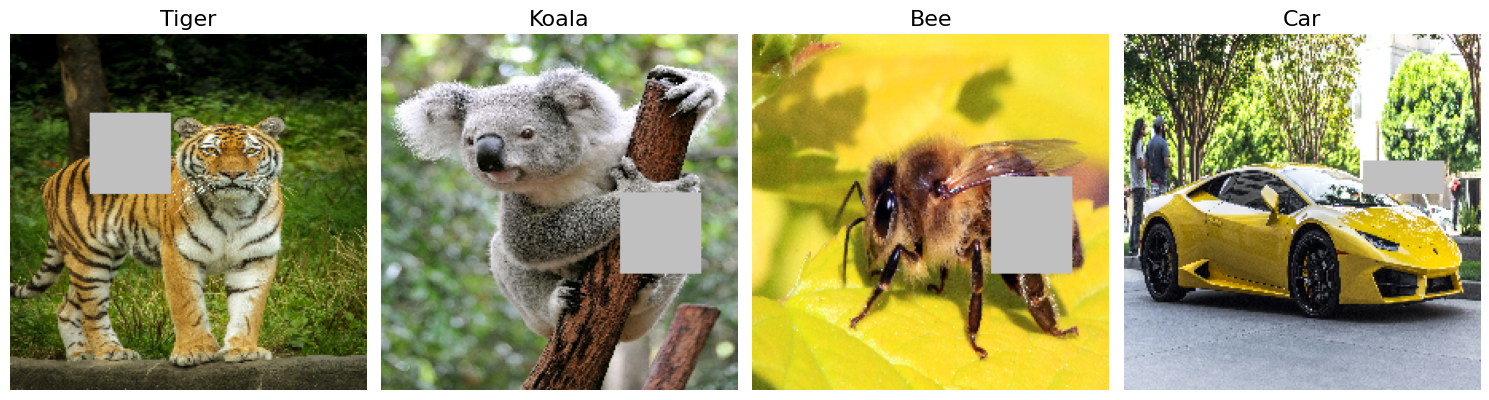

<ipython-input-5-2b3c543af2c3>:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels([k[1] for k in preds], rotation=90)


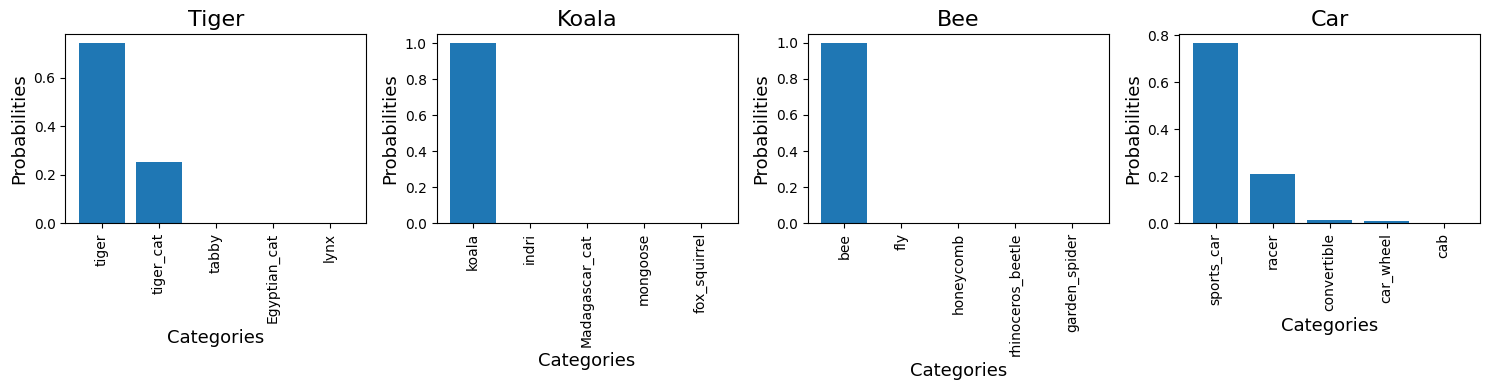

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions, VGG16
from PIL import Image, ImageDraw

# Initialize model
model = VGG16(weights='imagenet')

def process_image(img_path, draw_rectangles):
    """ Load image, draw rectangles, convert to array, preprocess, and predict. """
    img = image.load_img(img_path, target_size=(224, 224))
    draw = ImageDraw.Draw(img)
    draw.rectangle(draw_rectangles, outline="#C0C0C0", fill="#C0C0C0")
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    features = model.predict(img_array)
    preds = decode_predictions(features, top=5)[0]
    return img, preds

image_paths = [
    '/content/drive/MyDrive/Vis/tiger.jpeg',
    '/content/drive/MyDrive/Vis/koala.jpeg',
    '/content/drive/MyDrive/Vis/Bee.jpeg',
    '/content/drive/MyDrive/Vis/Car.jpeg'
]
rectangles = [
    [(50, 50), (100, 100)],
    [(150, 100), (200, 150)],
    [(200, 90), (150, 150)],
    [(150, 80), (200, 100)]
]

# Process images and store results
images, predictions = [], []
for path, rect in zip(image_paths, rectangles):
    img, pred = process_image(path, rect)
    images.append(img)
    predictions.append(pred)

# Preparing visualization
image_titles = ['Tiger', 'Koala', 'Bee', 'Car']
f, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 4))
for i, (title, img) in enumerate(zip(image_titles, images)):
    ax[i].imshow(np.asarray(img))
    ax[i].set_title(title, fontsize=16)
    ax[i].axis('off')
plt.tight_layout()
plt.show()

f, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 4))
for i, (title, preds) in enumerate(zip(image_titles, predictions)):
    ax[i].bar([k[1] for k in preds], [k[2] for k in preds])
    ax[i].set_xticklabels([k[1] for k in preds], rotation=90)
    ax[i].set_ylabel('Probabilities', fontsize=13)
    ax[i].set_xlabel('Categories', fontsize=13)
    ax[i].set_title(title, fontsize=16)
    ax[i].axis('on')
plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 18ms/step


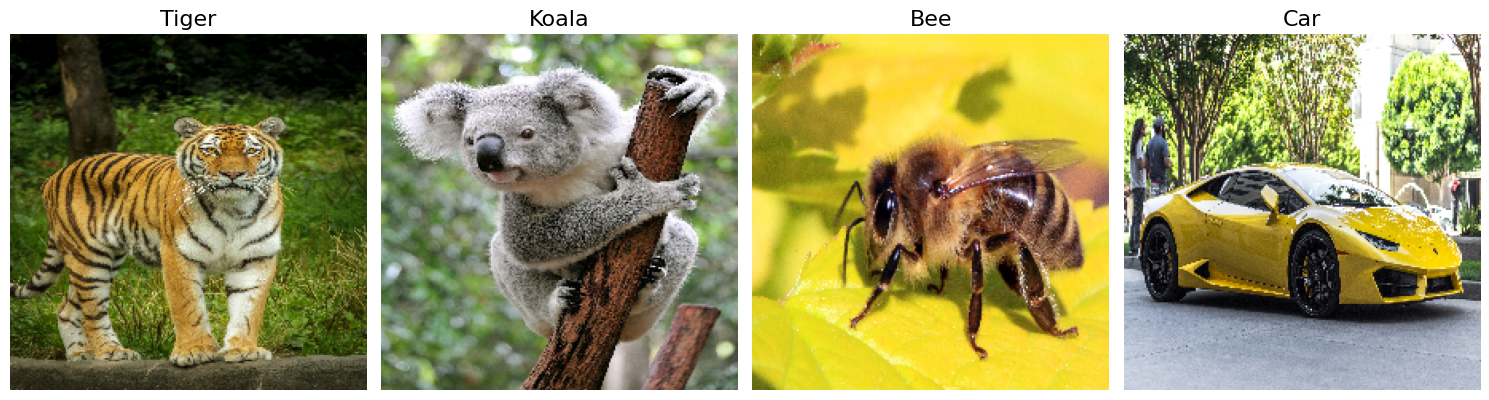

<ipython-input-6-9d75e21e4a86>:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels([k[1] for k in predictions[i][0]], rotation=90)


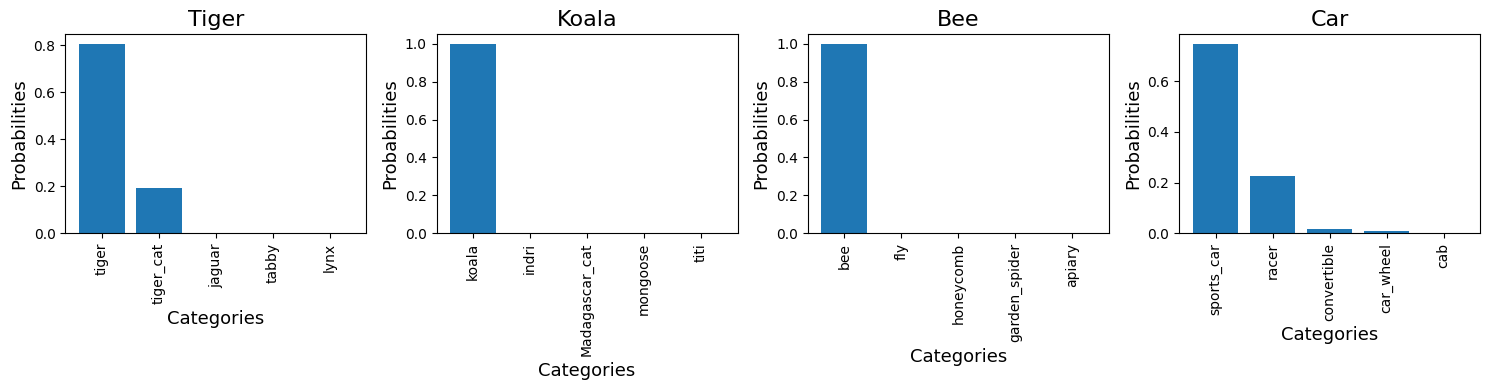

In [6]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

def load_process_image(image_path, model):
    img = load_img(image_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    predictions = decode_predictions(features)
    return img, predictions

# Define paths and titles
image_paths = ['/content/drive/MyDrive/Vis/tiger.jpeg', '/content/drive/MyDrive/Vis/koala.jpeg',
               '/content/drive/MyDrive/Vis/Bee.jpeg', '/content/drive/MyDrive/Vis/Car.jpeg']
image_titles = ['Tiger', 'Koala', 'Bee', 'Car']

# List to hold images and predictions
images, predictions = [], []

# Load and process images
for path in image_paths:
    img, pred = load_process_image(path, model)
    images.append(img)
    predictions.append(pred)

# Display images
f, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 4))
for i, title in enumerate(image_titles):
    ax[i].imshow(np.asarray(images[i]))
    ax[i].set_title(title, fontsize=16)
    ax[i].axis('off')
plt.tight_layout()
plt.show()

# Display predictions
f, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 4))
for i, preds in enumerate(predictions):
    ax[i].set_title(title, fontsize=16)
    ax[i].bar([k[1] for k in predictions[i][0]], [k[2] for k in predictions[i][0]])
    ax[i].set_xticklabels([k[1] for k in predictions[i][0]], rotation=90)
    ax[i].set_ylabel('Probabilities', fontsize=13)
    ax[i].set_xlabel('Categories', fontsize=13)
    ax[i].set_title(image_titles[i], fontsize=16)
    ax[i].axis('on')
plt.tight_layout()
plt.show()


Implement functions required to use attentions
----------------------------------------------

### Model modifier

When the softmax activation function is applied to the last layer of model, it may obstruct generating the attention images, so you should replace the function to a linear activation function. Although we create and use `ReplaceToLinear` instance here, we can also use the model modifier function defined by ourselves.

In [7]:
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear

replace2linear = ReplaceToLinear()

# Instead of using the ReplaceToLinear instance above,
# you can also define the function from scratch as follows:
def model_modifier_function(cloned_model):
    cloned_model.layers[-1].activation = tf.keras.activations.linear

### Score function

And then, you **MUST** create `Score` instance or define `score function` that returns target scores. Here, they return the score values corresponding Goldfish, Bear, Assault Rifle.

In [8]:
from tf_keras_vis.utils.scores import CategoricalScore

# Define the indices for ImageNet classes: Tiger (292), Koala (105), Bee (309), Car (817)
score = CategoricalScore([292, 105, 309, 817])

# # Instead of using CategoricalScore object,
# # you can also define the function from scratch as follows:
# def score_function(output):
#     # The `output` variable refers to the output of the model,
#     # so, in this case, `output` shape is `(3, 1000)` i.e., (samples, classes).
#     return (output[0][2], output[1][2], output[1][22], output[2][49])

## Vanilla Saliency

`Saliency` generates a saliency map that appears the regions of ​​the input image that contributes the most to the output value.

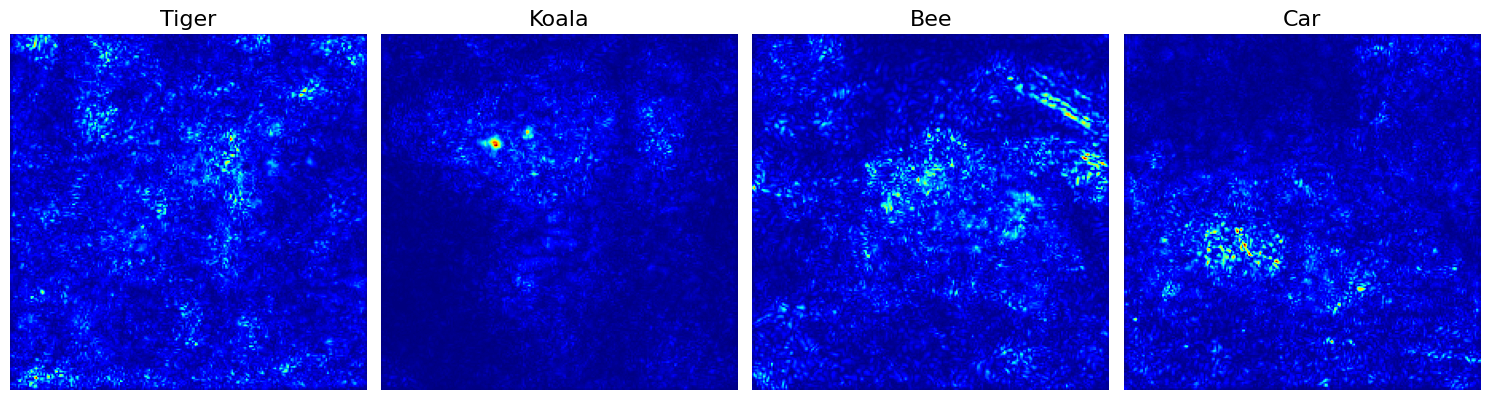

CPU times: user 1.68 s, sys: 951 ms, total: 2.64 s
Wall time: 3.41 s


In [15]:
%%time
from tensorflow.keras import backend as K
from tf_keras_vis.saliency import Saliency
# from tf_keras_vis.utils import normalize

images = np.array([image.img_to_array(img) for img in images])
# Create Saliency object.
saliency = Saliency(model,
                    model_modifier=replace2linear,
                    clone=True)

# Generate saliency map
saliency_maps = saliency(score, images)


## Since v0.6.0, calling `normalize()` is NOT necessary.
# saliency_map = normalize(saliency_map)

# Render
f, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 4))
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(saliency_maps[i], cmap='jet')
    ax[i].axis('off')
plt.tight_layout()
plt.show()

## SmoothGrad

As you can see above, Vanilla Saliency map is too noisy, so let's remove noise in the saliency map using SmoothGrad! SmoothGrad is a method that reduce the noise in saliency map by adding noise to input image.

**Note:** Because SmoothGrad calculates the gradient repeatedly, it might take much time around 2-3 minutes when using CPU.

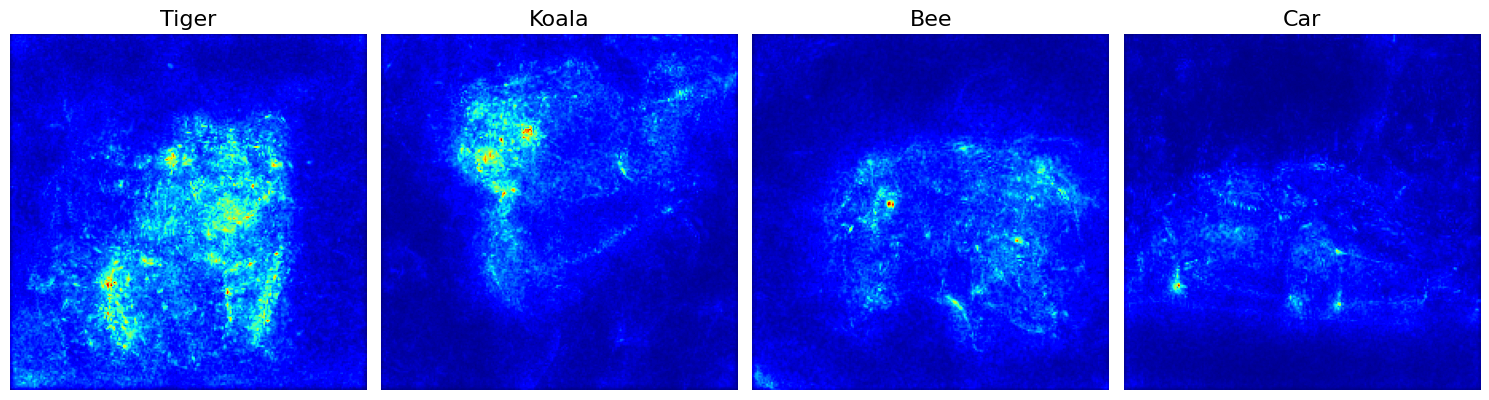

CPU times: user 2.4 s, sys: 246 ms, total: 2.65 s
Wall time: 5 s


In [16]:
%%time

# Generate saliency map with smoothing that reduce noise by adding noise
saliency_map = saliency(score,
                        images,
                        smooth_samples=20, # The number of calculating gradients iterations.
                        smooth_noise=0.20) # noise spread level.

## Since v0.6.0, calling `normalize()` is NOT necessary.
# saliency_map = normalize(saliency_map)

# Render
f, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 4))
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(saliency_map[i], cmap='jet')
    ax[i].axis('off')
plt.tight_layout()
# plt.savefig('images/smoothgrad.png')
plt.show()

## GradCAM

Saliency is one of useful way of visualizing attention that appears the regions of the input image that contributes the most to the output value.
GradCAM is another way of visualizing attention over input. Instead of using gradients of model outputs, it uses of penultimate layer output (that is the convolutional layer just before Dense layers).

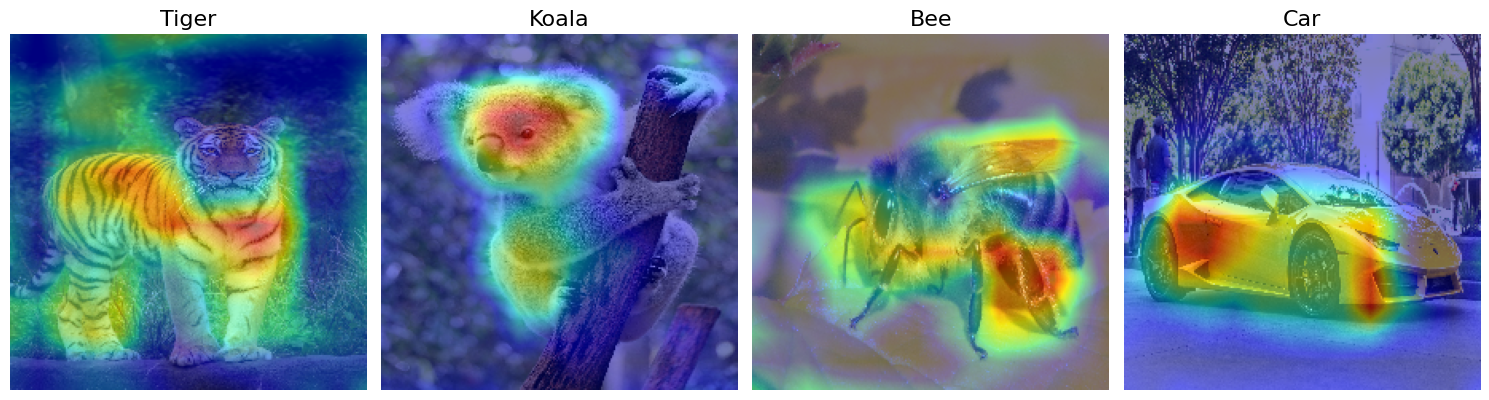

CPU times: user 2.12 s, sys: 832 ms, total: 2.95 s
Wall time: 3.26 s


In [17]:
%%time

from matplotlib import cm
from tf_keras_vis.gradcam import Gradcam
from tensorflow.keras.preprocessing.image import array_to_img

# Create Gradcam object
gradcam = Gradcam(model,
                  model_modifier=replace2linear,
                  clone=True)

# Generate heatmap with GradCAM
cam = gradcam(score,
              images,
              penultimate_layer=-1)

## Since v0.6.0, calling `normalize()` is NOT necessary.
# cam = normalize(cam)

# Render
f, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 4))
for i, title in enumerate(image_titles):
    heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(array_to_img(images[i]))
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5) # overlay
    ax[i].axis('off')
plt.tight_layout()
plt.show()

As you can see above, GradCAM is useful method for intuitively knowing where the attention is. However, when you take a look closely, you'll see that the visualized attentions don't completely cover the target (especially the head of Bear) in the picture.

Okay then, let's move on to next method that is able to fix the problem above you looked.

## GradCAM++

GradCAM++ can provide better visual explanations of CNN model predictions.

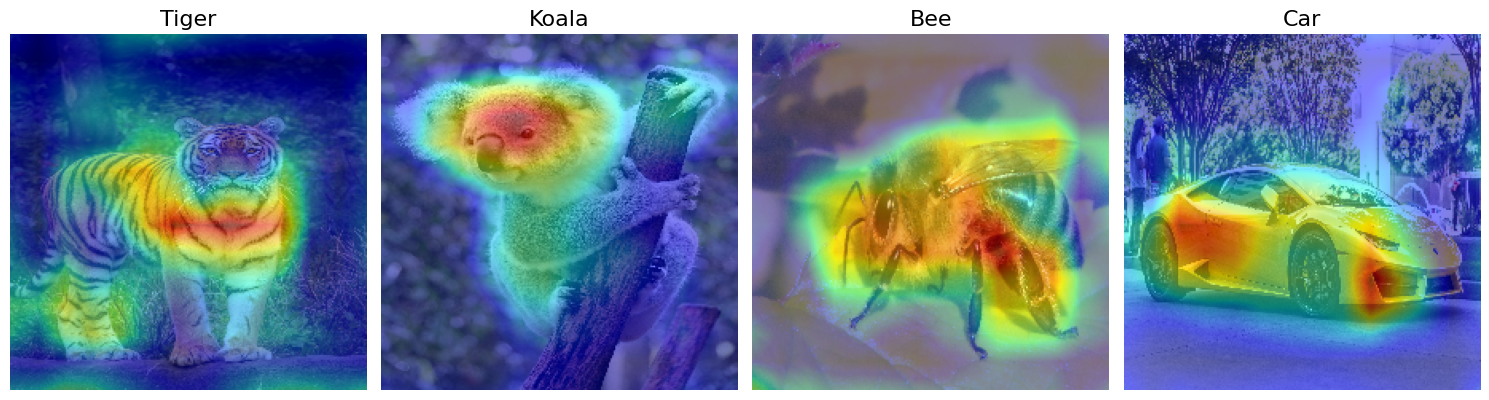

CPU times: user 2.49 s, sys: 769 ms, total: 3.26 s
Wall time: 3.36 s


In [18]:
%%time

from tf_keras_vis.gradcam_plus_plus import GradcamPlusPlus

# Create GradCAM++ object
gradcam = GradcamPlusPlus(model,
                          model_modifier=replace2linear,
                          clone=True)

# Generate heatmap with GradCAM++
cam = gradcam(score,
              images,
              penultimate_layer=-1)

## Since v0.6.0, calling `normalize()` is NOT necessary.
# cam = normalize(cam)

# Render
f, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 4))
for i, title in enumerate(image_titles):
    heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(array_to_img(images[i]))
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5)
    ax[i].axis('off')
plt.tight_layout()
# plt.savefig('images/gradcam_plus_plus.png')
plt.show()

As you can see above, Now, the visualized attentions almost completely cover the target objects!

## ScoreCAM

In the end, Here, we show you ScoreCAM. It is an another method that generates Class Activation Map. The characteristic of this method is that it's the `gradient-free` method unlike GradCAM, GradCAM++ or Saliency.

64/64 [==============================] - 7s 117ms/step


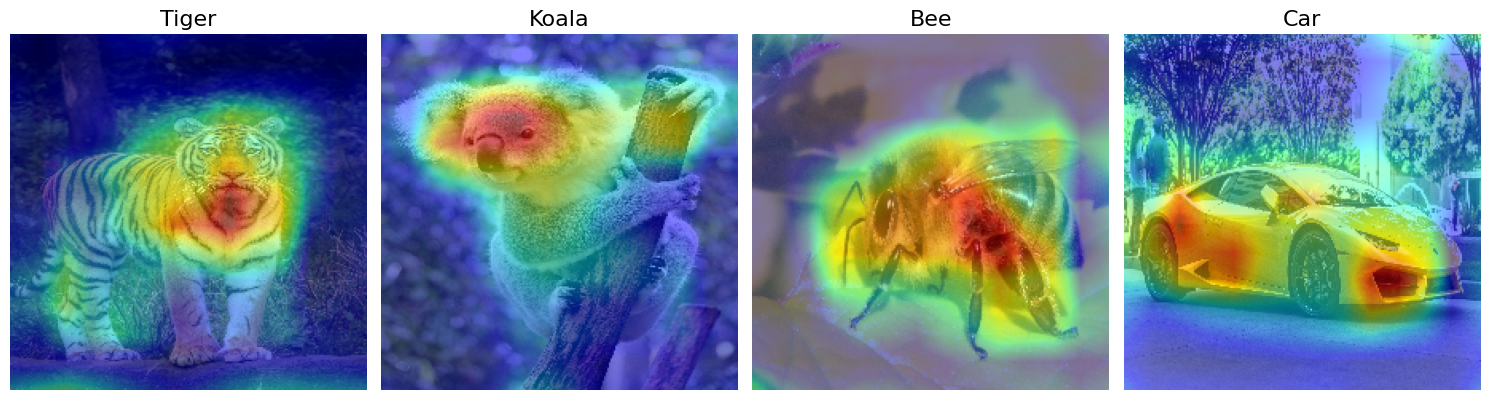

CPU times: user 24.4 s, sys: 3.4 s, total: 27.8 s
Wall time: 33.1 s


In [19]:
%%time

from tf_keras_vis.scorecam import Scorecam
from tf_keras_vis.utils import num_of_gpus

# Create ScoreCAM object
scorecam = Scorecam(model)

# Generate heatmap with ScoreCAM
cam = scorecam(score, images, penultimate_layer=-1)

## Since v0.6.0, calling `normalize()` is NOT necessary.
# cam = normalize(cam)

# Render
f, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 4))
for i, title in enumerate(image_titles):
    heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(array_to_img(images[i]))
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5)
    ax[i].axis('off')
plt.tight_layout()
plt.show()

As you can see above, The visualized images are more sophisticated!

## Faster-ScoreCAM

ScoreCAM is a great method, however, it takes a bit more time to process it than other cam methods.
There is a good news for us. Faster-ScorecAM that makes ScoreCAM to be more efficient was devised by @tabayashi0117.

https://github.com/tabayashi0117/Score-CAM/blob/master/README.md#faster-score-cam

> We thought that several channels were dominant in generating the final heat map. Faster-Score-CAM adds the processing of “use only channels with large variances as mask images” to Score-CAM. (max_N = -1 is the original Score-CAM).


5/5 [==============================] - 1s 129ms/step


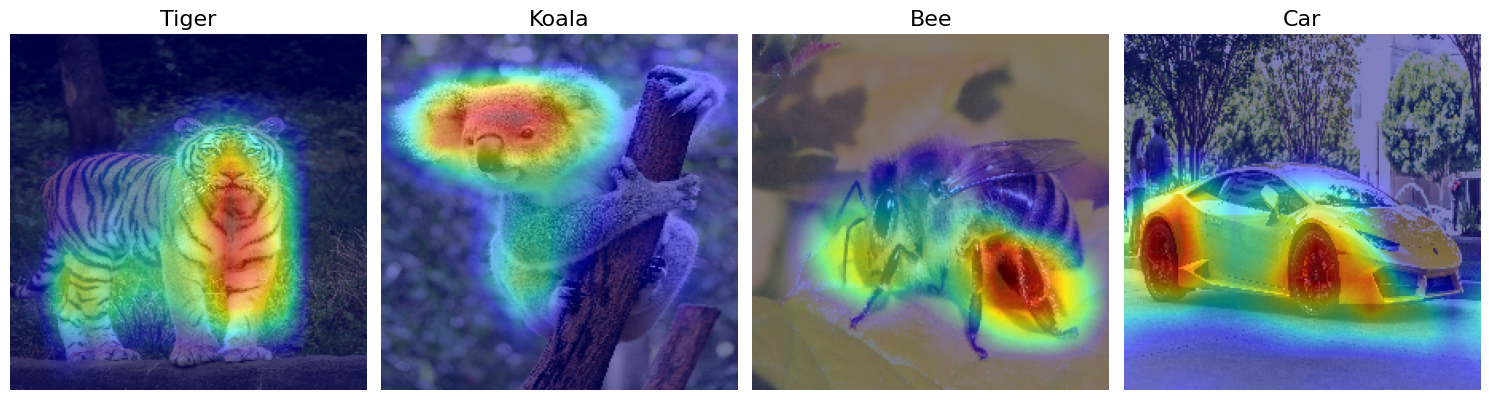

CPU times: user 3.53 s, sys: 1.1 s, total: 4.62 s
Wall time: 4.93 s


In [20]:
%%time

from tf_keras_vis.scorecam import Scorecam

# Create ScoreCAM object
scorecam = Scorecam(model, model_modifier=replace2linear)

# Generate heatmap with Faster-ScoreCAM
cam = scorecam(score,
               images,
               penultimate_layer=-1,
               max_N=10)

## Since v0.6.0, calling `normalize()` is NOT necessary.
# cam = normalize(cam)

# Render
f, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 4))
for i, title in enumerate(image_titles):
    heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(array_to_img(images[i]))
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5)
    ax[i].axis('off')
plt.tight_layout()
plt.show()